In [390]:
from qiskit import QuantumCircuit, Aer, execute, transpile, execute, IBMQ
from qiskit_aer import AerSimulator

from qiskit.tools.monitor import job_monitor
from qiskit.circuit.library import WeightedAdder

from qiskit.circuit import Instruction, CircuitInstruction, Qubit, QuantumRegister, Clbit, ClassicalRegister
from qiskit.circuit.library.standard_gates import IGate, XGate, CXGate, CCXGate, C3XGate, C4XGate, MCXGate, \
                                                  RXGate, RYGate, RZGate, HGate
from qiskit.exceptions import QiskitError

import matplotlib.pyplot as plt
%matplotlib inline
from qiskit.visualization import plot_histogram

import os
import sys
import math as m
import numpy as np
import pandas as pd
import sympy

from _functools import *
from traceback import format_exc

from qmul import setInputs, initGates

In [391]:
backend = AerSimulator(method='matrix_product_state')

In [392]:
weights = [5567]*10

aCirc1 = WeightedAdder(num_state_qubits=len(weights), weights=weights)

In [393]:
aCirc1.num_qubits

42

In [394]:
nQubits = aCirc1.num_qubits
qubits = aCirc1.qubits

sumQubitIndices = [qubitIndex for qubitIndex in range(len(qubits)) if "'sum'" in str(qubits[qubitIndex])]
nInputs = str(qubits).count("'state'")
nOutputs = len(sumQubitIndices)

In [395]:
q = QuantumRegister(nQubits, 'q')
c = ClassicalRegister(nOutputs, 'c')

aCirc = QuantumCircuit(q, c)

In [396]:
initGates(aCirc, q, nInputs, gateName='x')

In [397]:
aCirc.append(aCirc1, range(nQubits))

In [398]:
aCirc.measure(sumQubitIndices, range(nOutputs))

In [399]:
job = execute(aCirc, backend, shots=2000)
result = job.result()
counts = result.get_counts()

print(counts)

for count in list(counts):
    print(int(count, 2))

{'1101100101110110': 2000}
55670


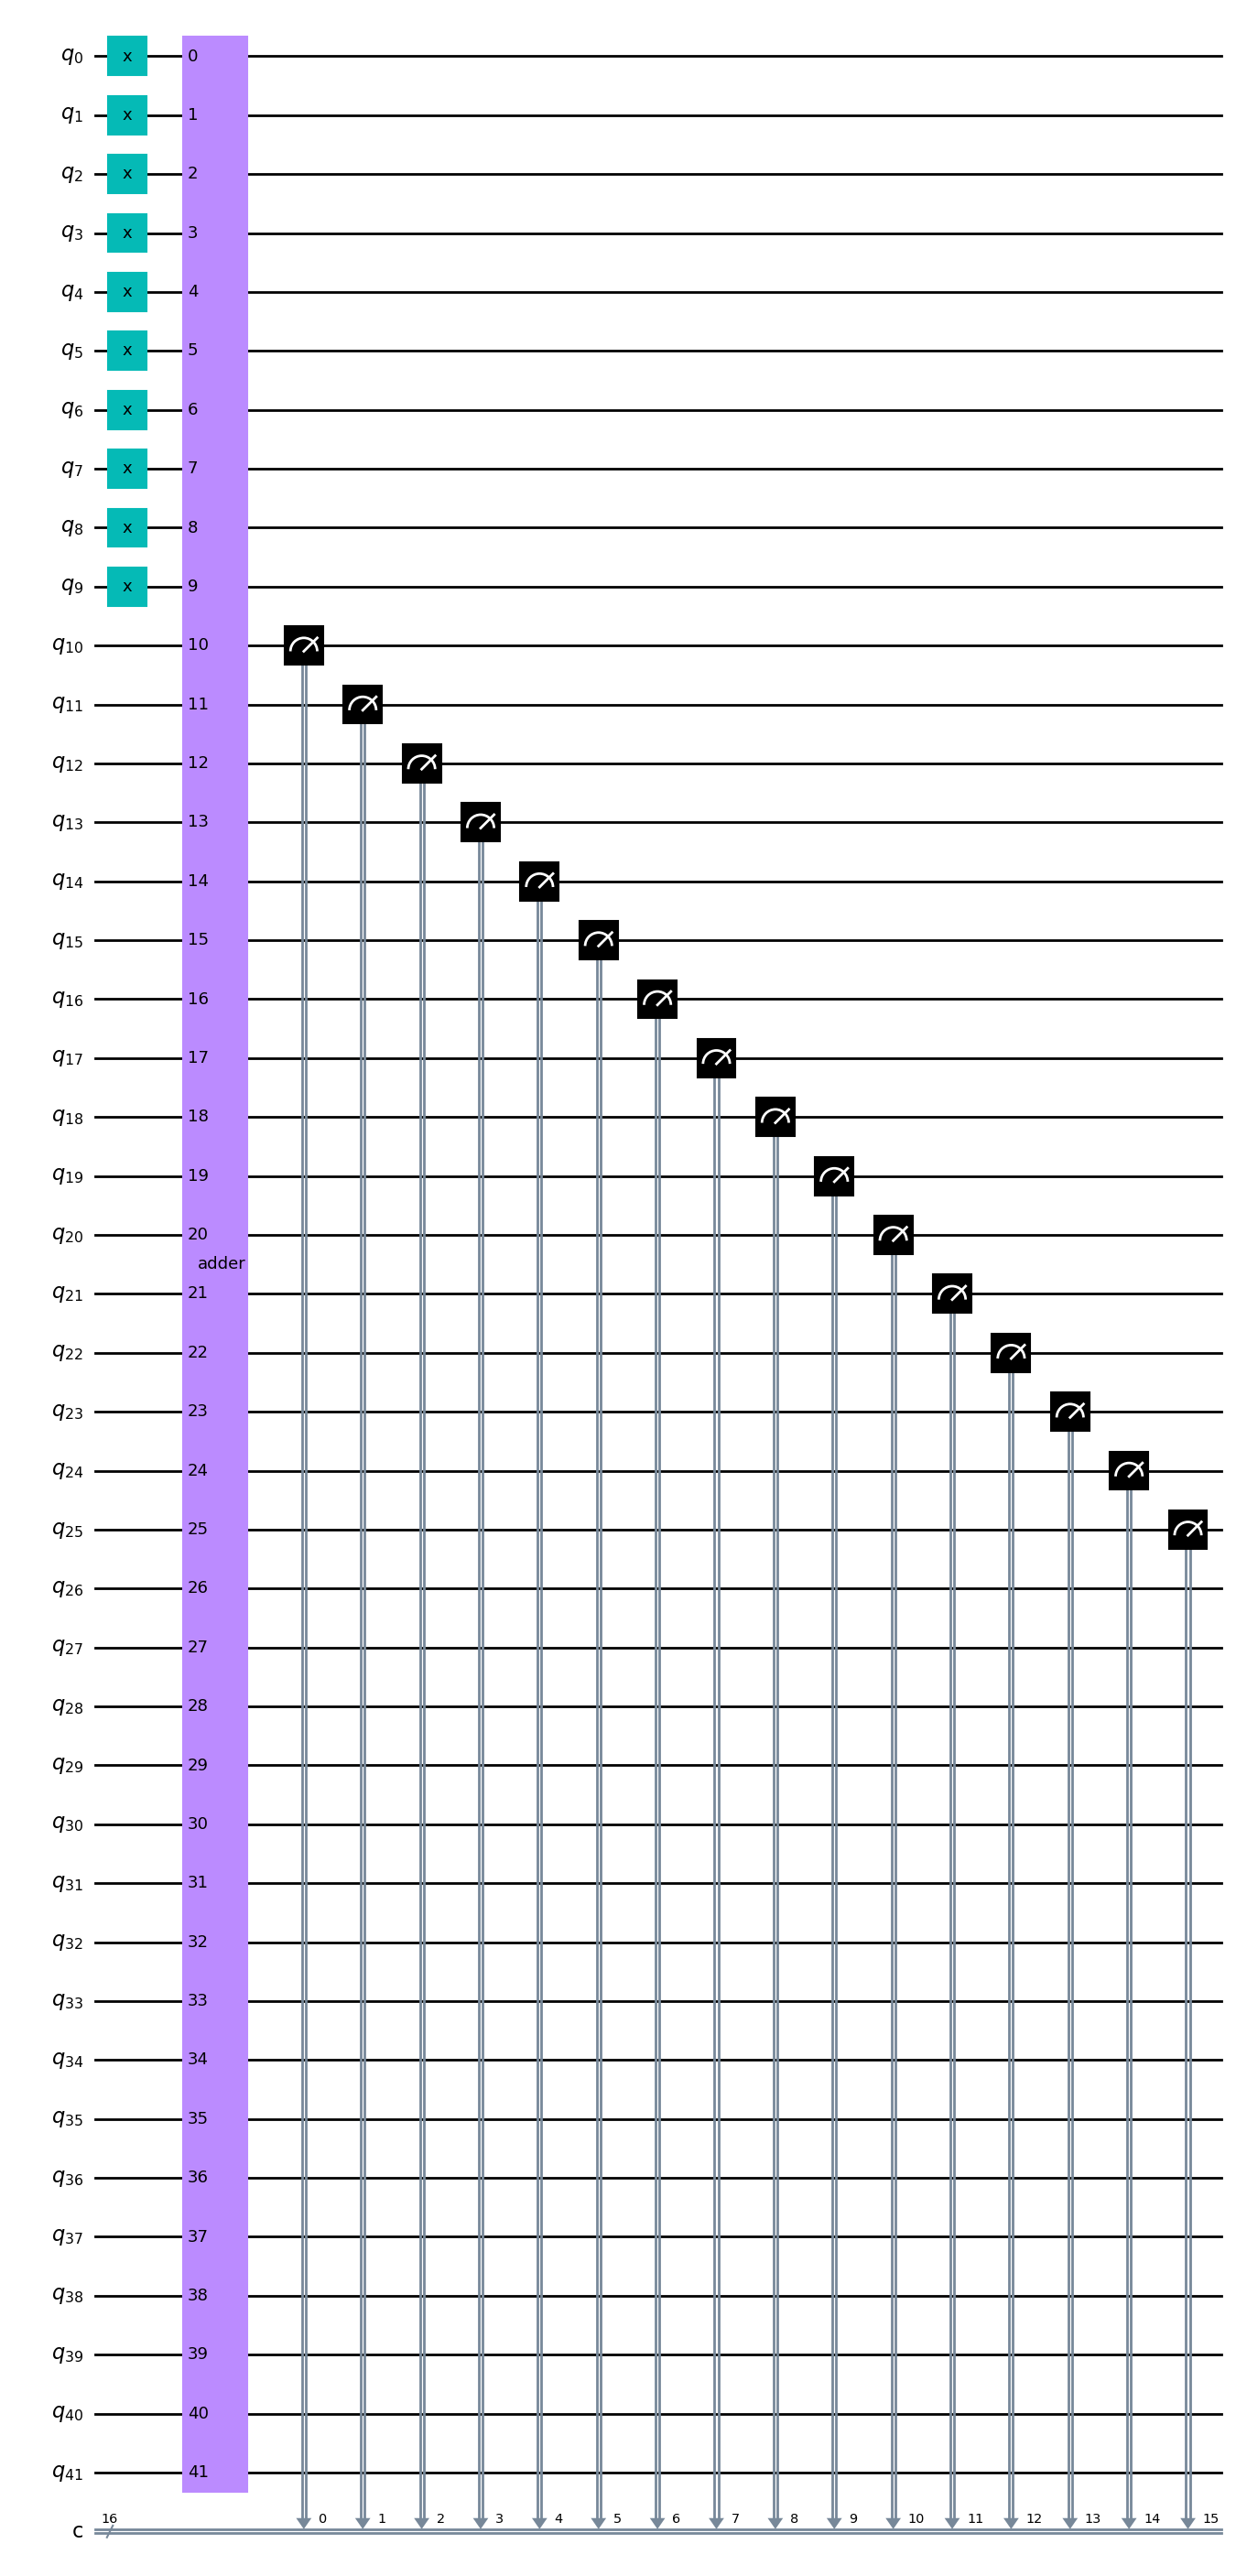

In [400]:
aCirc.draw(output='mpl')

In [401]:
list(aCirc.data)

[CircuitInstruction(operation=Instruction(name='x', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(42, 'q'), 0),), clbits=()),
 CircuitInstruction(operation=Instruction(name='x', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(42, 'q'), 1),), clbits=()),
 CircuitInstruction(operation=Instruction(name='x', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(42, 'q'), 2),), clbits=()),
 CircuitInstruction(operation=Instruction(name='x', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(42, 'q'), 3),), clbits=()),
 CircuitInstruction(operation=Instruction(name='x', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(42, 'q'), 4),), clbits=()),
 CircuitInstruction(operation=Instruction(name='x', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(42, 'q'), 5),), clbits=()),
 CircuitInstruction(operation=Instruction(name='x', num_qubits=1, num_clbits=0, params=[]), qubits=(

In [402]:
raise Exception

Exception: 

In [ ]:
help(WeightedAdder)